In [1]:
import pandas as pd
import numpy as np
import pyreadstat as ps

In [2]:
df_spss , meta = ps.read_sav('Sorted dataset of School dropout.sav')
df_spss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 58 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Serial_no  210 non-null    float64
 1   Q_1        210 non-null    object 
 2   Q_2        210 non-null    float64
 3   Q_3        210 non-null    float64
 4   Q_4        210 non-null    float64
 5   Q_5        210 non-null    float64
 6   Q_6        200 non-null    float64
 7   Q_7        210 non-null    float64
 8   Drop_out   210 non-null    float64
 9   Q_8        210 non-null    float64
 10  Q_9        210 non-null    float64
 11  Q_10       210 non-null    float64
 12  Q_11       210 non-null    float64
 13  Q_12       210 non-null    float64
 14  Q_13       210 non-null    float64
 15  Q_14       210 non-null    object 
 16  Q_15       210 non-null    object 
 17  Q_16       210 non-null    float64
 18  Q_17       210 non-null    float64
 19  Q_18       210 non-null    float64
 20  Q_19      

In [3]:
df_spss['Drop_out']= df_spss['Drop_out'].astype('category')
df_spss.describe()
df_spss['Drop_out'].value_counts()

#Drop_out 1: Yes, 2:No

Drop_out
1.0    144
2.0     66
Name: count, dtype: int64

In [4]:
# Create a dictionary to map old names to new names
column_mapping = {
    'Q_3': 'age',
    'Q_4': 'Number_of_family_members',
    'Q_5': 'Yearly_family_income',
    'Q_18': 'Total_siblings', 
    'Q_19': 'Number_of_siblings_droput'
}

# Rename the columns
df_spss.rename(columns=column_mapping, inplace=True)

# Now the columns are renamed
print(df_spss)


     Serial_no           Q_1  Q_2   age  Number_of_family_members  \
0          1.0  Nasima Akter  2.0  27.0                       8.0   
1          2.0        Nilufa  2.0  26.0                      10.0   
2          3.0    Runa Begum  2.0  26.0                       6.0   
3          4.0        Saniya  2.0  15.0                       7.0   
4          5.0  Moyna Khatun  2.0  20.0                       5.0   
..         ...           ...  ...   ...                       ...   
205      162.0        Ishita  2.0  22.0                       8.0   
206      163.0         Amena  2.0  14.0                       5.0   
207      164.0        Nizhum  2.0  13.0                       5.0   
208      165.0        Saleha  2.0  15.0                       5.0   
209      166.0   Juthi Begum  2.0  13.0                       6.0   

     Yearly_family_income  Q_6  Q_7 Drop_out  Q_8  ...  Q_37_vi  Q_37_vii  \
0                150000.0  3.0  0.0      1.0  1.0  ...      1.0       1.0   
1                

c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

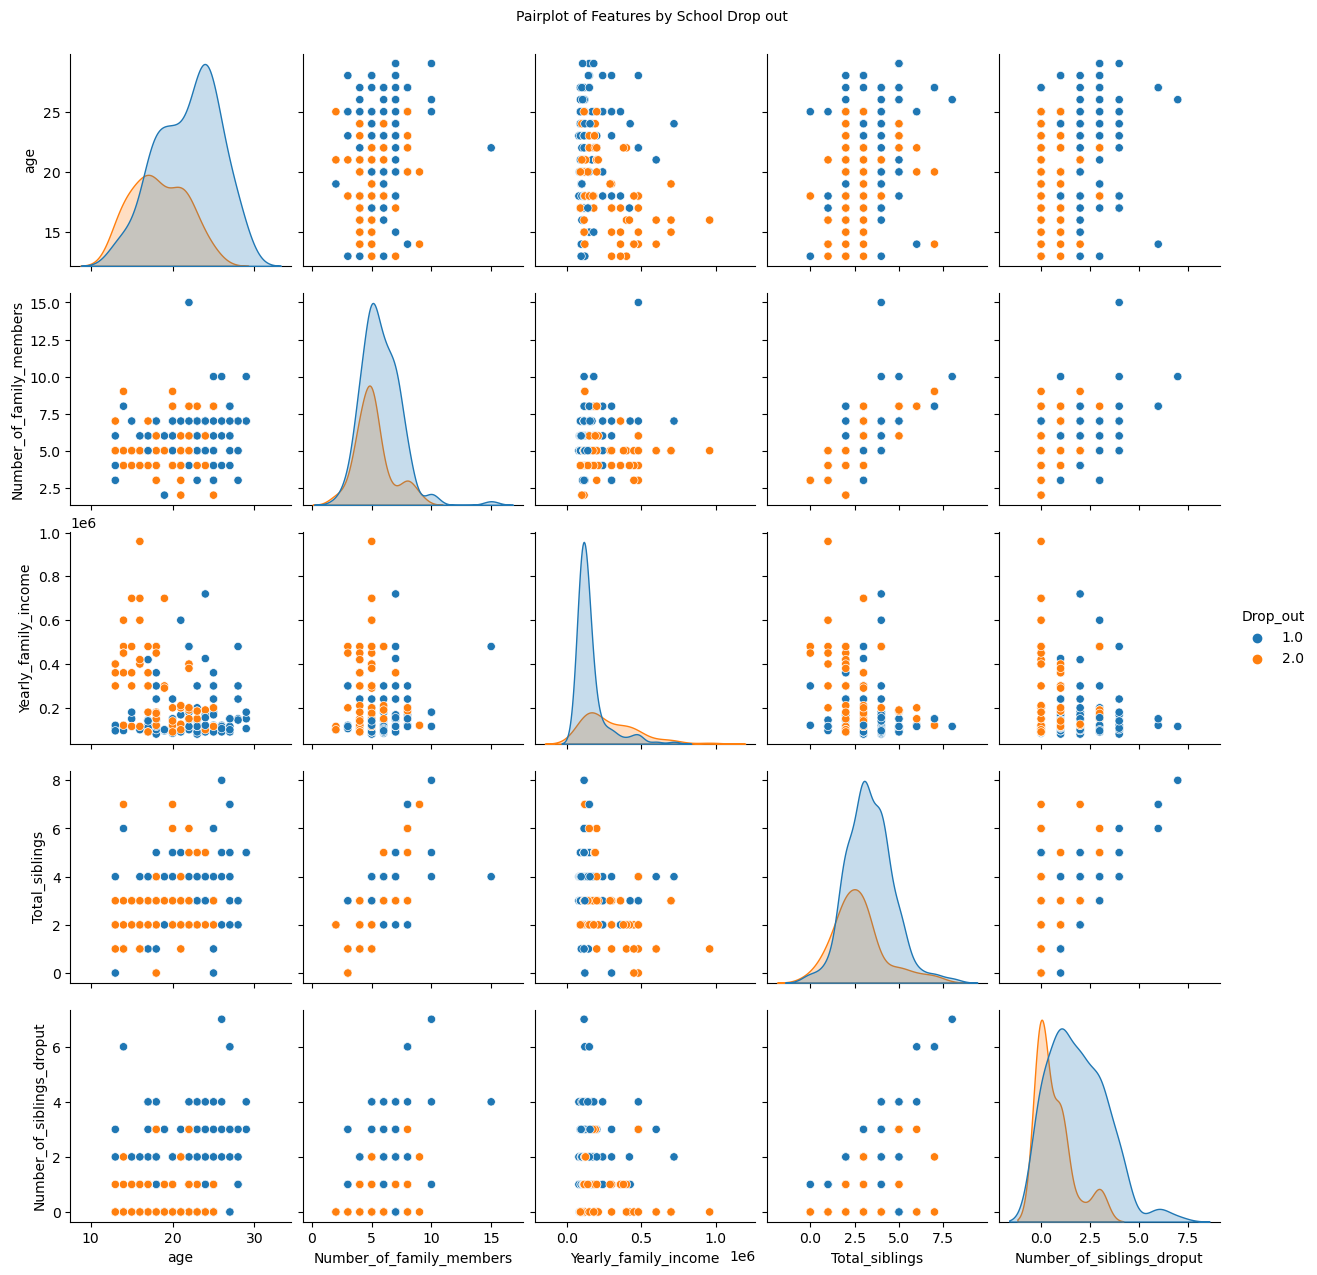

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pairplot to visualize relationships between features
sns.pairplot(df_spss, hue='Drop_out', vars=['age','Number_of_family_members','Yearly_family_income','Total_siblings', 'Number_of_siblings_droput'])
plt.suptitle('Pairplot of Features by School Drop out', size=10, y=1.02)
plt.show()

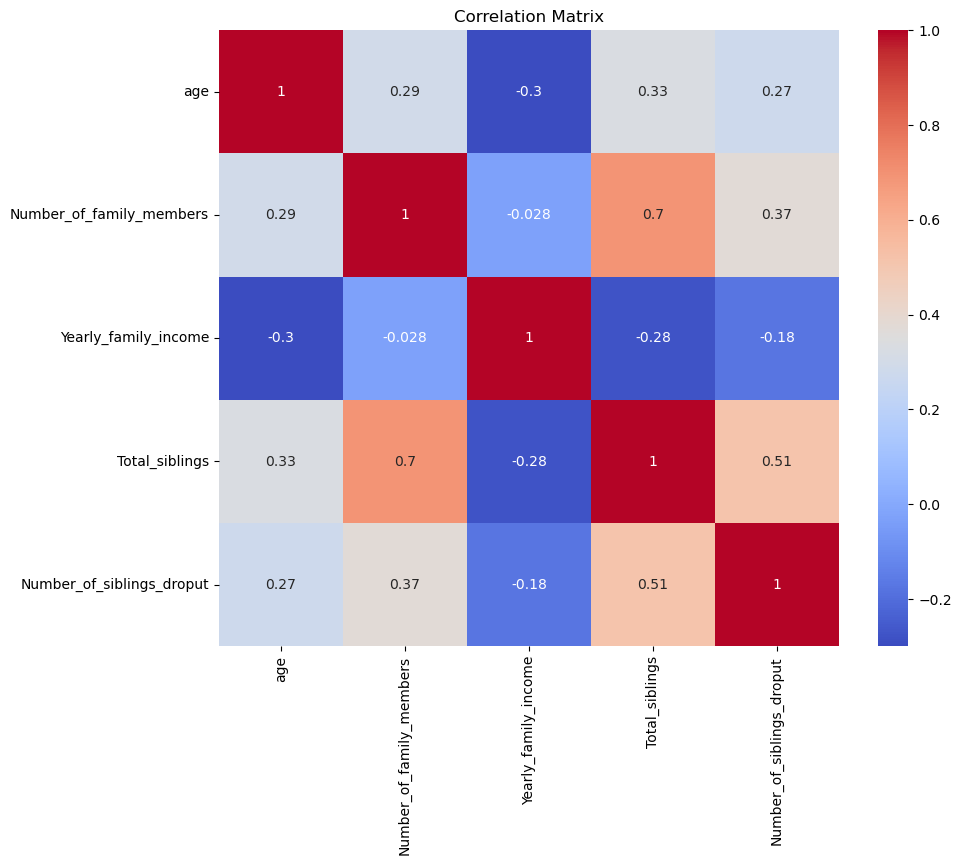

In [6]:
column_names = ['age', 'Number_of_family_members', 'Yearly_family_income', 'Total_siblings', 'Number_of_siblings_droput']

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_spss[column_names].corr()  # Remove extra brackets
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [8]:
x = df_spss[['age','Number_of_family_members','Yearly_family_income','Total_siblings', 'Number_of_siblings_droput']]
y = df_spss['Drop_out'].map({1:1, 2:0})
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state =20)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.50      0.64        18
           1       0.79      0.97      0.87        35

    accuracy                           0.81        53
   macro avg       0.85      0.74      0.76        53
weighted avg       0.83      0.81      0.79        53

Confusion Matrix:
 [[ 9  9]
 [ 1 34]]
Accuracy Score: 0.8113207547169812


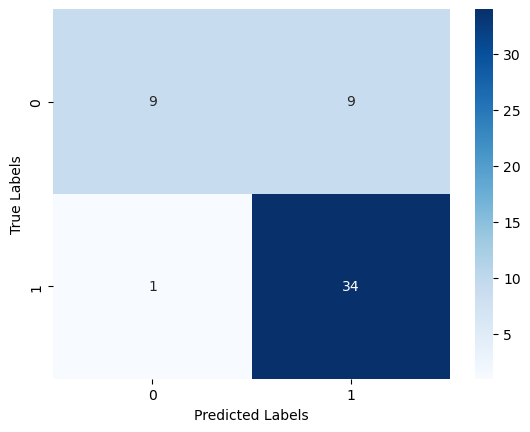

In [9]:
# Build and Evaluate Gaussian Naive Bayes Classifier
nb = GaussianNB()
nb.fit(x_train, y_train)
predictionsNB = nb.predict(x_test)

# Print Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictionsNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictionsNB))
print('Accuracy Score:', accuracy_score(y_test, predictionsNB))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictionsNB)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.91      0.91      0.91        35

    accuracy                           0.89        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.89      0.89      0.89        53

Confusion Matrix:
 [[15  3]
 [ 3 32]]
Accuracy Score: 0.8867924528301887


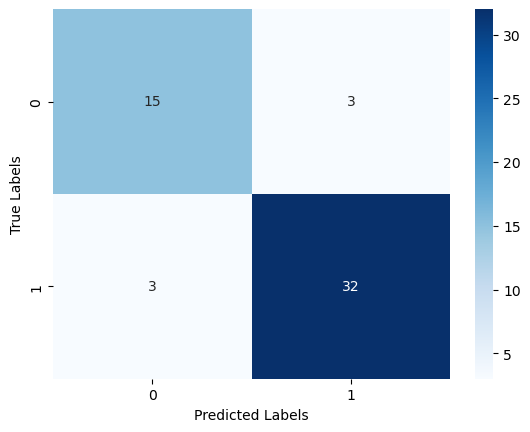

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
predictions_dt = dt_classifier.predict(x_test)

# Evaluate and visualize results 
# Print Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictions_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions_dt))
print('Accuracy Score:', accuracy_score(y_test, predictions_dt))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictions_dt)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.91      0.91      0.91        35

    accuracy                           0.89        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.89      0.89      0.89        53

Confusion Matrix:
 [[15  3]
 [ 3 32]]
Accuracy Score: 0.8867924528301887


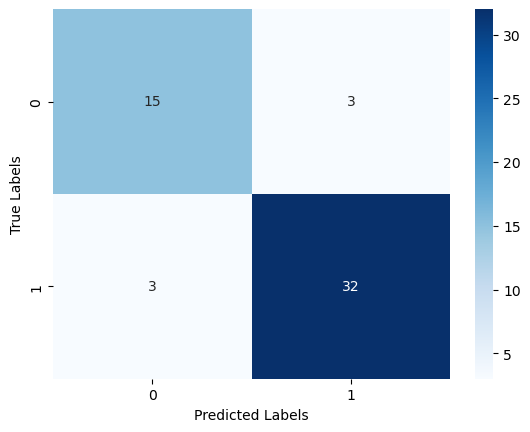

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
predictions_rf = rf_classifier.predict(x_test)

# Evaluate and visualize results 
#rint Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictions_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions_rf))
print('Accuracy Score:', accuracy_score(y_test, predictions_rf))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.82      0.91      0.86        35

    accuracy                           0.81        53
   macro avg       0.80      0.76      0.78        53
weighted avg       0.81      0.81      0.80        53

Confusion Matrix:
 [[11  7]
 [ 3 32]]
Accuracy Score: 0.8113207547169812


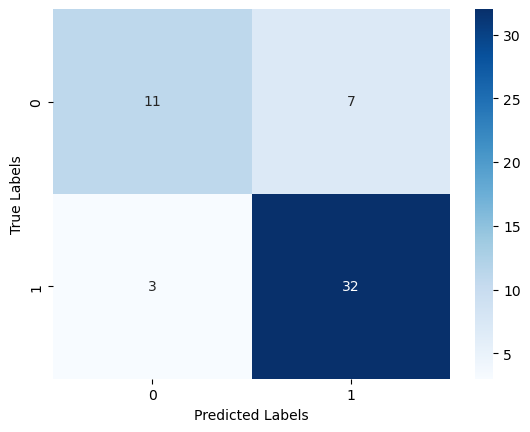

In [12]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
predictions_svm = svm_classifier.predict(x_test)


#Print Classification Report, Confusion Matrix, and Accuracy Score
print('Classification Report:\n', classification_report(y_test, predictions_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions_svm))
print('Accuracy Score:', accuracy_score(y_test, predictions_svm))

# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, predictions_svm)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [13]:
# Continue with model fitting
logit_model = sm.Logit(y, x)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.417527
         Iterations 7
                             Results: Logit
Model:                  Logit              Method:             MLE       
Dependent Variable:     Drop_out           Pseudo R-squared:   0.329     
Date:                   2023-11-25 13:00   AIC:                185.3614  
No. Observations:       210                BIC:                202.0970  
Df Model:               4                  Log-Likelihood:     -87.681   
Df Residuals:           205                LL-Null:            -130.72   
Converged:              1.0000             LLR p-value:        8.9363e-18
No. Iterations:         7.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
age                        0.0998   0.03

c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\miniconda3\envs\urban_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.66      1.00      0.80        35

    accuracy                           0.66        53
   macro avg       0.33      0.50      0.40        53
weighted avg       0.44      0.66      0.53        53

Confusion Matrix:
 [[ 0 18]
 [ 0 35]]
Accuracy Score: 0.660377358490566


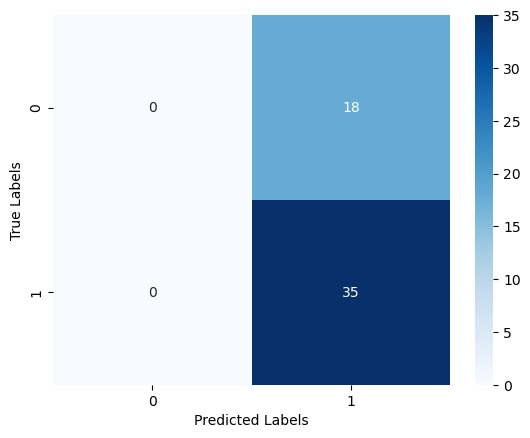

In [15]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and
model = LogisticRegression()
model.fit(x_train, y_train)

prediction_blg = model.predict(x_test)
model.score(x_test,y_test)
print('Classification Report:\n',classification_report(y_test, prediction_blg))
print('Confusion Matrix:\n',confusion_matrix(y_test, prediction_blg))
print('Accuracy Score:',accuracy_score(y_test, prediction_blg))


# Visualzie the confusion Matrix data
conf_matrix = confusion_matrix(y_test, prediction_blg)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

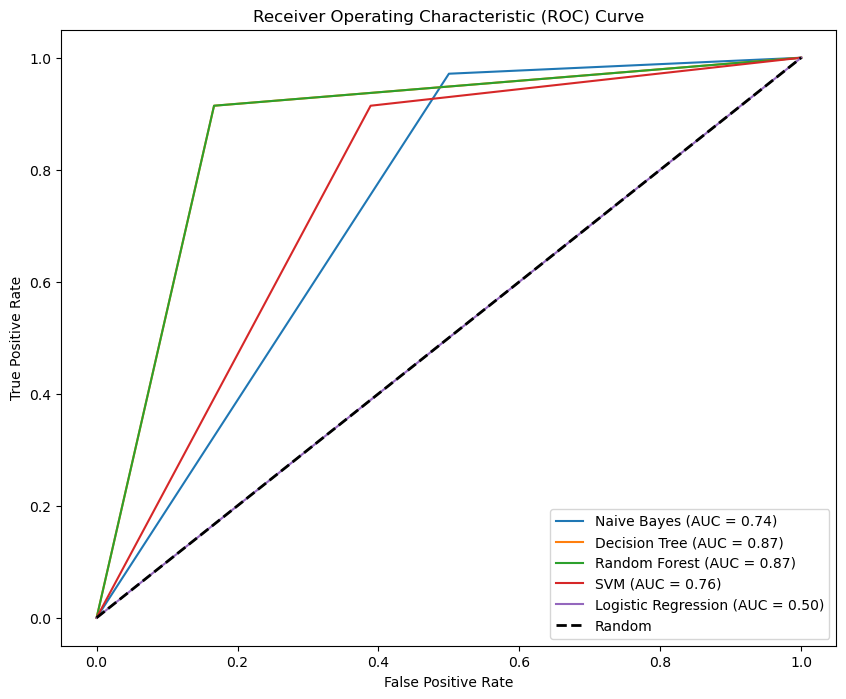

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming predictionsNB, predictions_dt, predictions_rf, predictions_svm, and prediction_blg are model predictions
predictions_list = [predictionsNB, predictions_dt, predictions_rf, predictions_svm, prediction_blg]
algorithm_names = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']

plt.figure(figsize=(10, 8))

for i, predictions in enumerate(predictions_list):
    fpr, tpr, _ = roc_curve(y_test, predictions) 
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{algorithm_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
